In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix
import itertools
from tensorflow.keras.utils import to_categorical

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Dataset Shape:
Train images: (60000, 28, 28) Train labels: (60000,)
Test images: (10000, 28, 28) Test labels: (10000,)


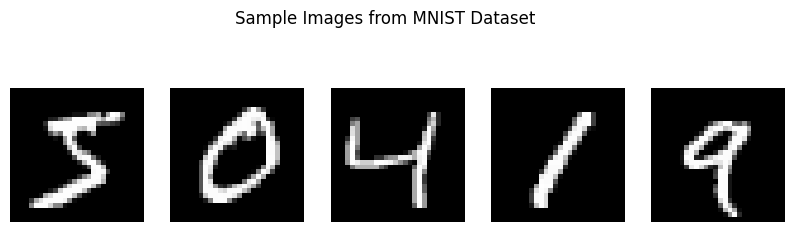

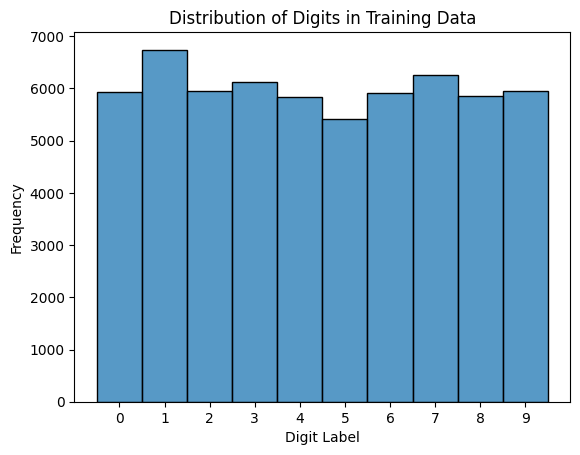

In [ ]:
# Exploratory Data Analysis (EDA)
print("Dataset Shape:")
print("Train images:", x_train.shape, "Train labels:", y_train.shape)
print("Test images:", x_test.shape, "Test labels:", y_test.shape)

# Display some sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
plt.suptitle("Sample Images from MNIST Dataset")
plt.show()

# Plot class distribution
sns.histplot(y_train, bins=np.arange(11)-0.5, kde=False)
plt.xticks(range(10))
plt.xlabel("Digit Label")
plt.ylabel("Frequency")
plt.title("Distribution of Digits in Training Data")
plt.show()

In [ ]:
# Data Preprocessing
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Define function to build model
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Define optimizers and learning rates
optimizers_list = [optimizers.SGD, optimizers.Adam, optimizers.RMSprop]
learning_rates = [0.01, 0.001, 0.0001]

Training with optimizer SGD and learning rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.5626 - loss: 1.4386 - val_accuracy: 0.9045 - val_loss: 0.2925
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 59ms/step - accuracy: 0.9259 - loss: 0.2414 - val_accuracy: 0.9512 - val_loss: 0.1522
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 55ms/step - accuracy: 0.9538 - loss: 0.1515 - val_accuracy: 0.9655 - val_loss: 0.1065
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - accuracy: 0.9645 - loss: 0.1153 - val_accuracy: 0.9724 - val_loss: 0.0864
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.9708 - loss: 0.0951 - val_accuracy: 0.9762 - val_loss: 0.0734


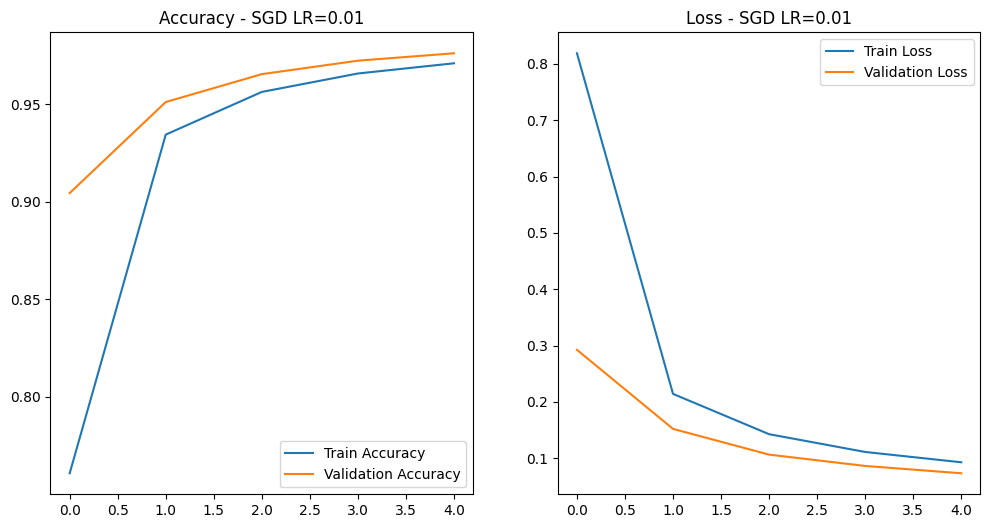

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


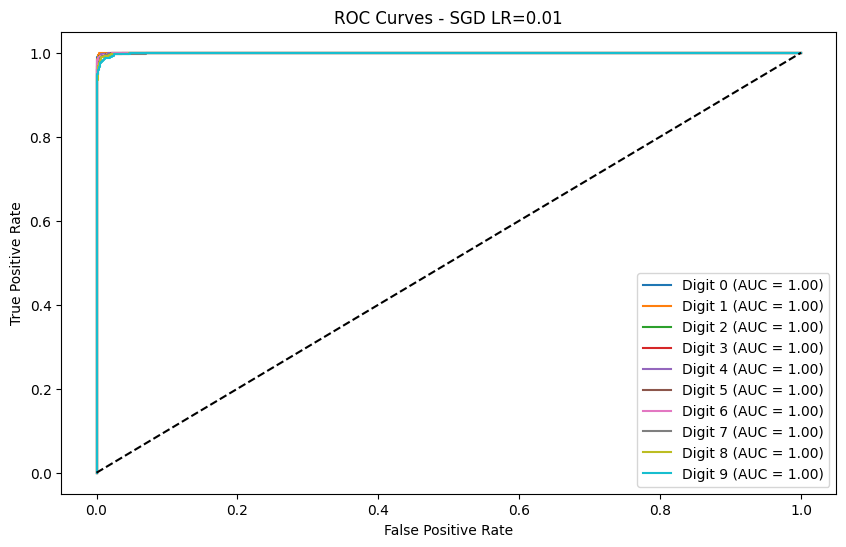

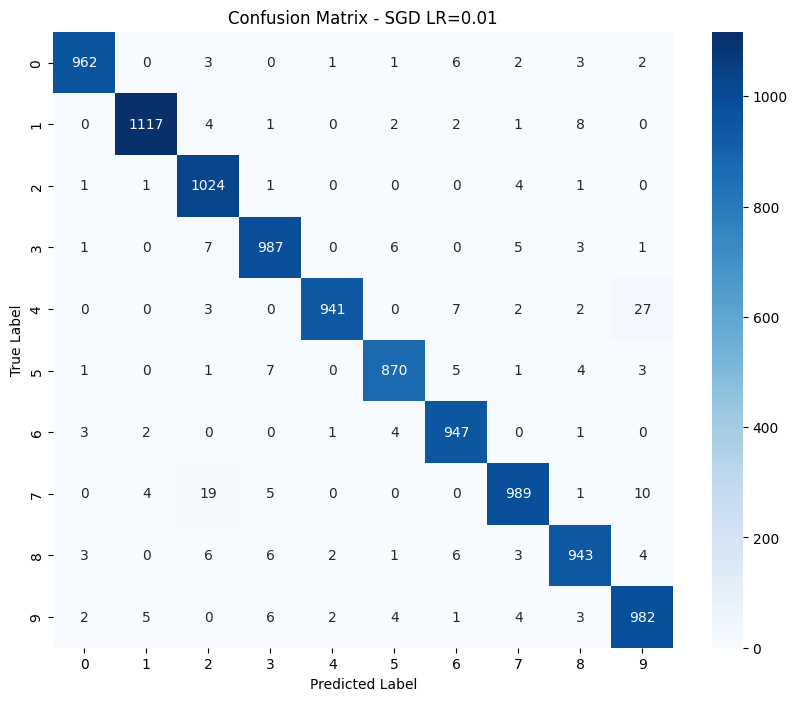

Training with optimizer SGD and learning rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.1184 - loss: 2.2863 - val_accuracy: 0.3311 - val_loss: 2.2221
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 57ms/step - accuracy: 0.4342 - loss: 2.1821 - val_accuracy: 0.6246 - val_loss: 1.9333
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.6372 - loss: 1.7063 - val_accuracy: 0.7864 - val_loss: 0.8992
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.7954 - loss: 0.8007 - val_accuracy: 0.8459 - val_loss: 0.5504
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 57s 61ms/step - accuracy: 0.8474 - loss: 0.5386 - val_accuracy: 0.8680 - val_loss: 0.4480


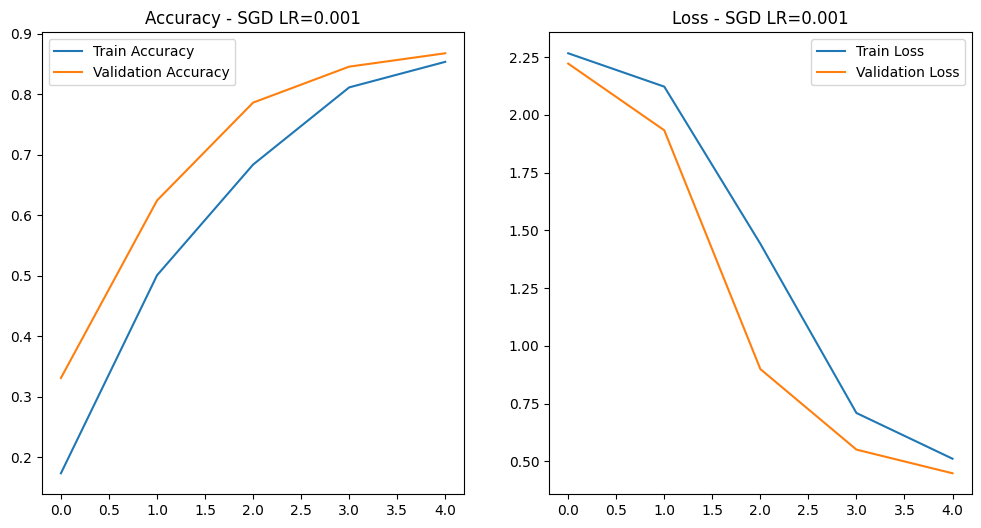

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


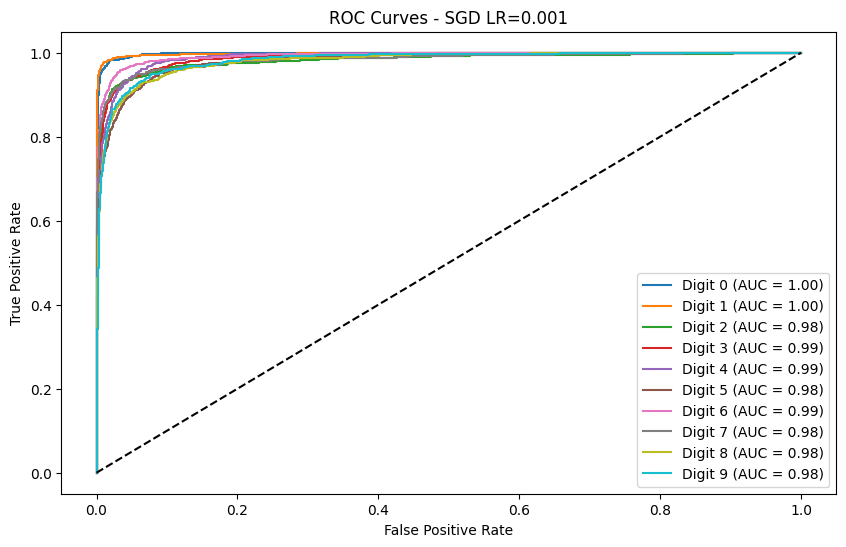

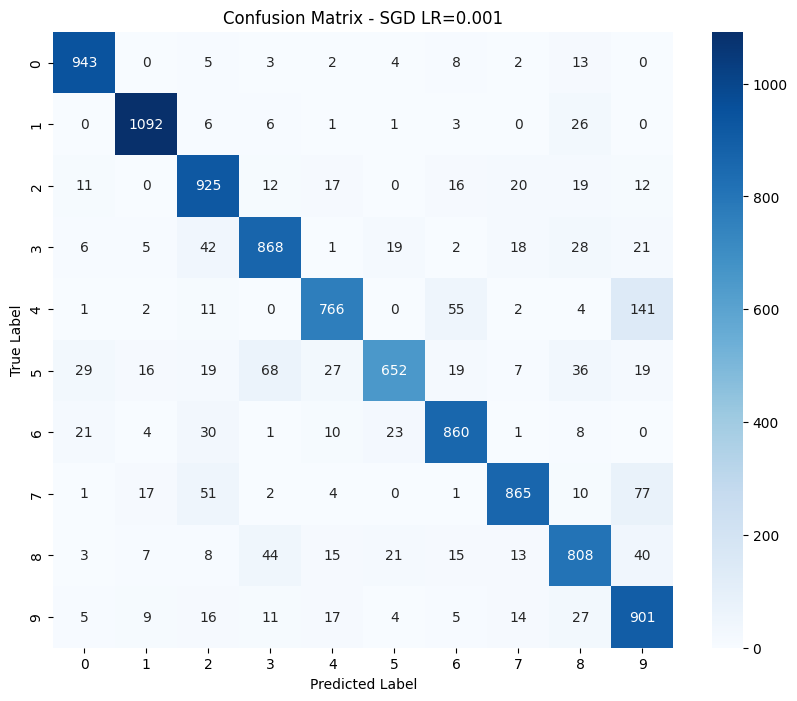

Training with optimizer SGD and learning rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 62ms/step - accuracy: 0.0790 - loss: 2.3057 - val_accuracy: 0.0917 - val_loss: 2.3033
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 62ms/step - accuracy: 0.1002 - loss: 2.3015 - val_accuracy: 0.1168 - val_loss: 2.2991
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 62ms/step - accuracy: 0.1246 - loss: 2.2975 - val_accuracy: 0.1410 - val_loss: 2.2952
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.1524 - loss: 2.2937 - val_accuracy: 0.1669 - val_loss: 2.2915
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 62ms/step - accuracy: 0.1753 - loss: 2.2901 - val_accuracy: 0.1880 - val_loss: 2.2877


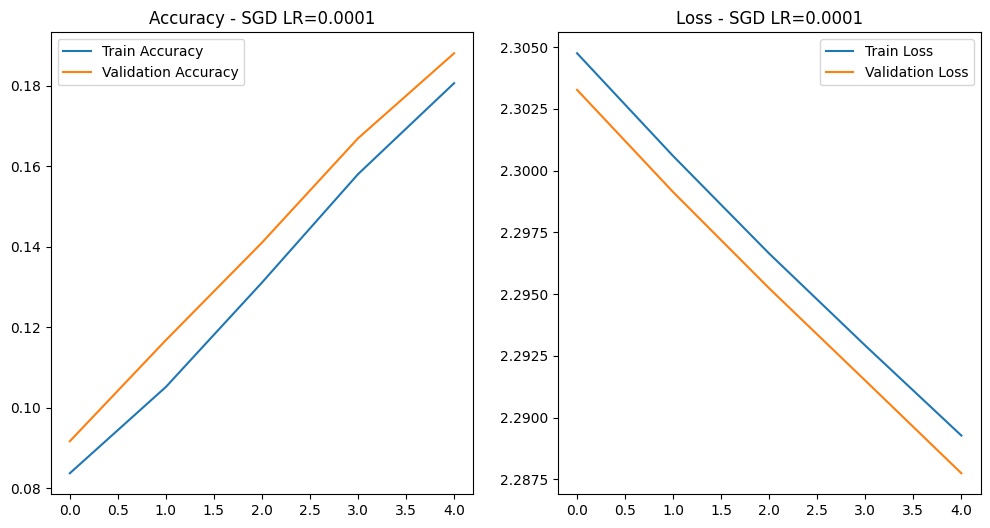

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


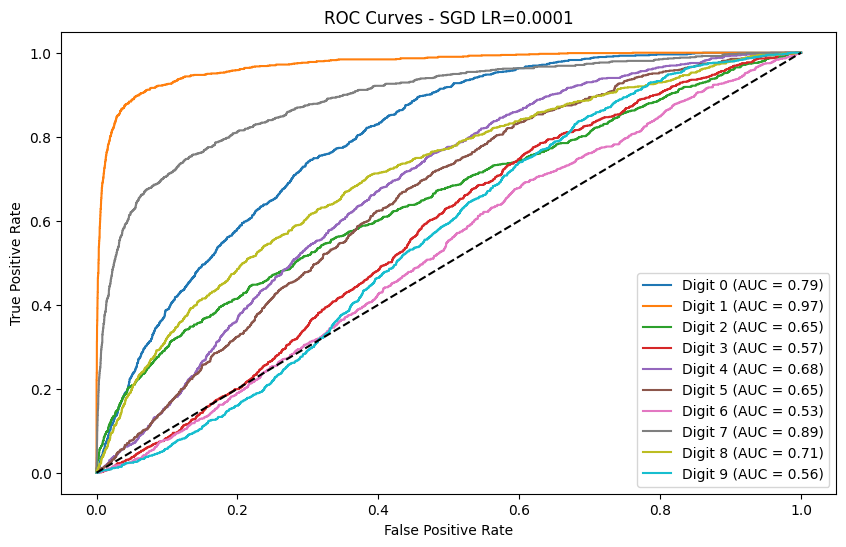

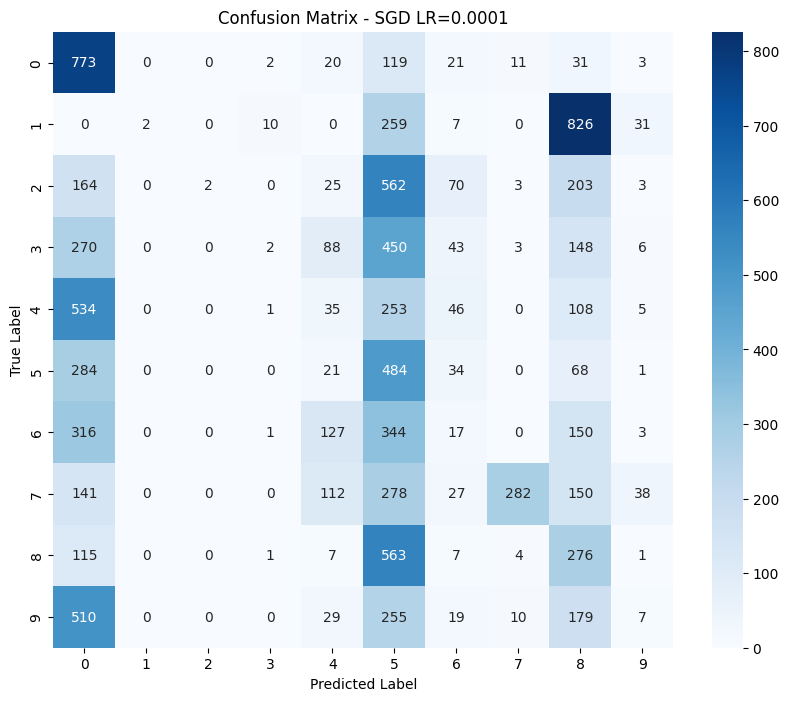

Training with optimizer Adam and learning rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 62s 63ms/step - accuracy: 0.9116 - loss: 0.2717 - val_accuracy: 0.9846 - val_loss: 0.0523
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.9796 - loss: 0.0690 - val_accuracy: 0.9842 - val_loss: 0.0549
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 65ms/step - accuracy: 0.9813 - loss: 0.0700 - val_accuracy: 0.9787 - val_loss: 0.0869
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - accuracy: 0.9816 - loss: 0.0687 - val_accuracy: 0.9821 - val_loss: 0.0761
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 64ms/step - accuracy: 0.9837 - loss: 0.0637 - val_accuracy: 0.9790 - val_loss: 0.0935


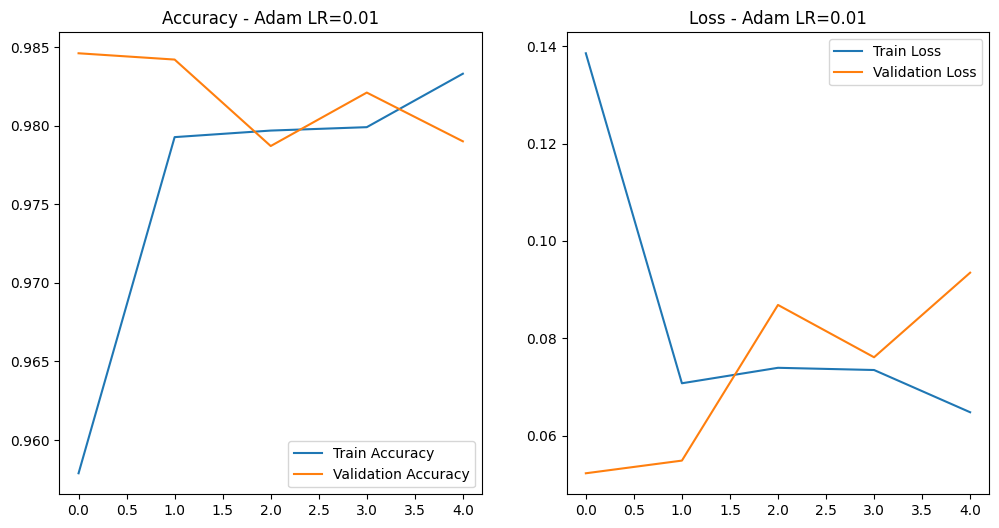

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


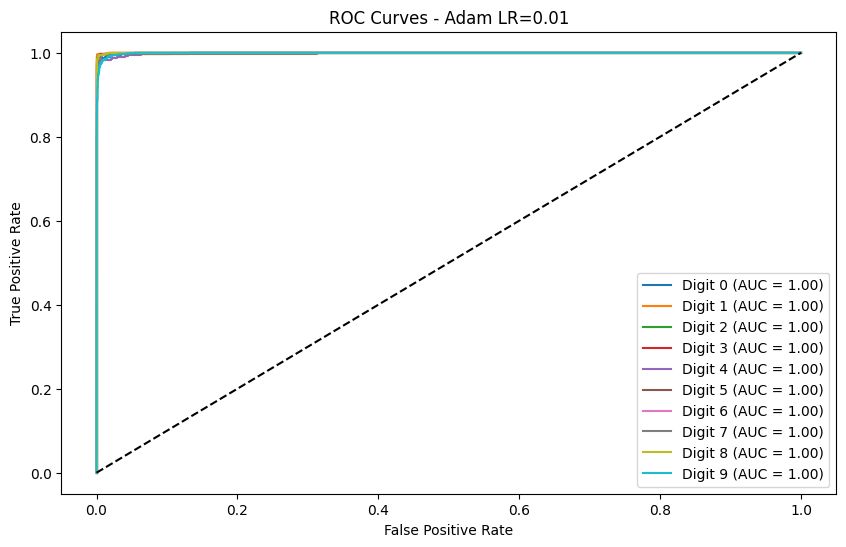

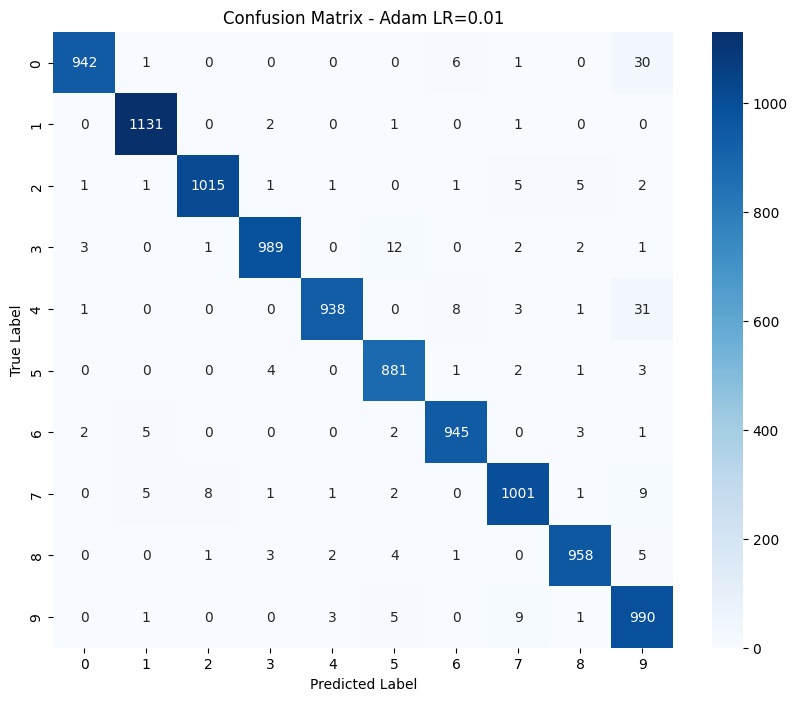

Training with optimizer Adam and learning rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 69s 71ms/step - accuracy: 0.8771 - loss: 0.4187 - val_accuracy: 0.9831 - val_loss: 0.0536
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 68ms/step - accuracy: 0.9824 - loss: 0.0549 - val_accuracy: 0.9876 - val_loss: 0.0401
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.9882 - loss: 0.0382 - val_accuracy: 0.9872 - val_loss: 0.0414
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 67ms/step - accuracy: 0.9918 - loss: 0.0279 - val_accuracy: 0.9858 - val_loss: 0.0455
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 70ms/step - accuracy: 0.9938 - loss: 0.0215 - val_accuracy: 0.9895 - val_loss: 0.0332


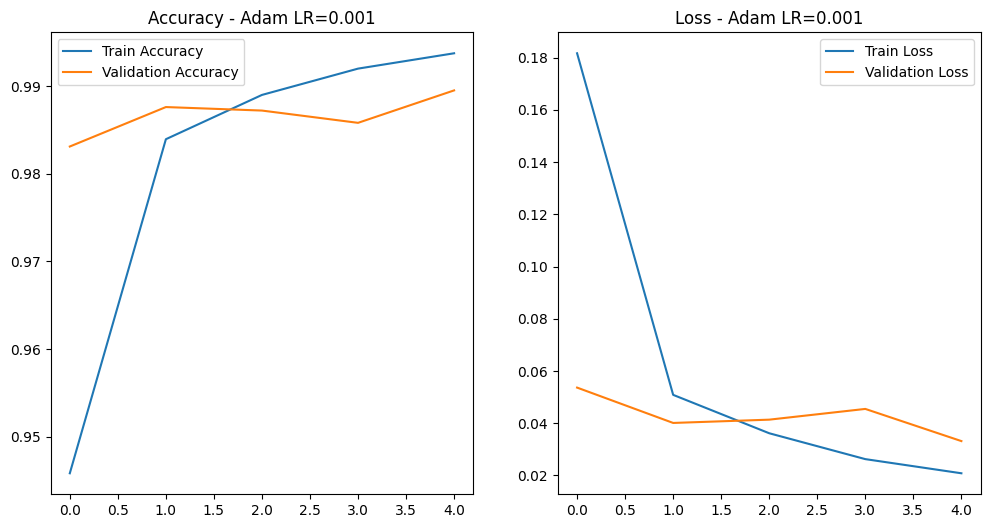

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


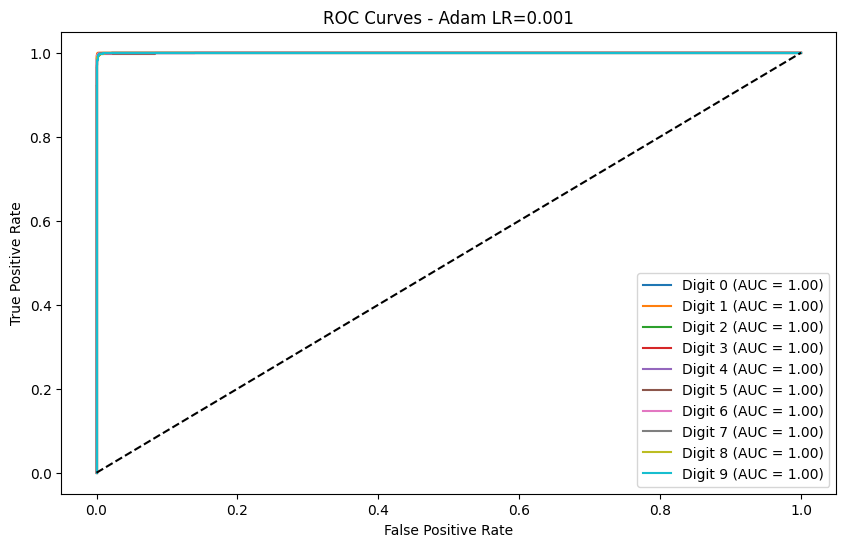

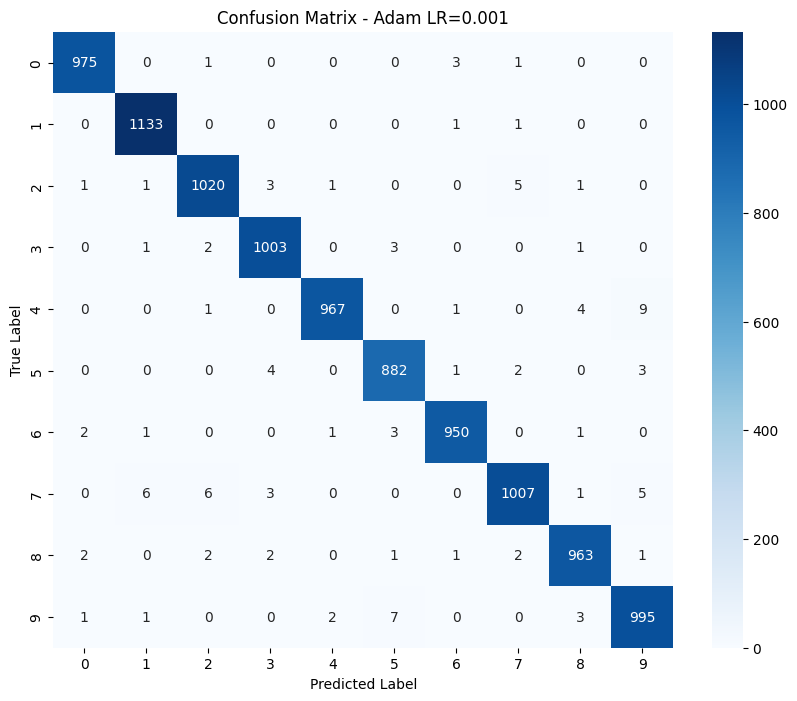

Training with optimizer Adam and learning rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 67s 69ms/step - accuracy: 0.6947 - loss: 1.1020 - val_accuracy: 0.9459 - val_loss: 0.1756
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 70ms/step - accuracy: 0.9512 - loss: 0.1663 - val_accuracy: 0.9621 - val_loss: 0.1164
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 71ms/step - accuracy: 0.9671 - loss: 0.1103 - val_accuracy: 0.9695 - val_loss: 0.0913
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 70ms/step - accuracy: 0.9741 - loss: 0.0864 - val_accuracy: 0.9760 - val_loss: 0.0762
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 68ms/step - accuracy: 0.9780 - loss: 0.0719 - val_accuracy: 0.9797 - val_loss: 0.0656


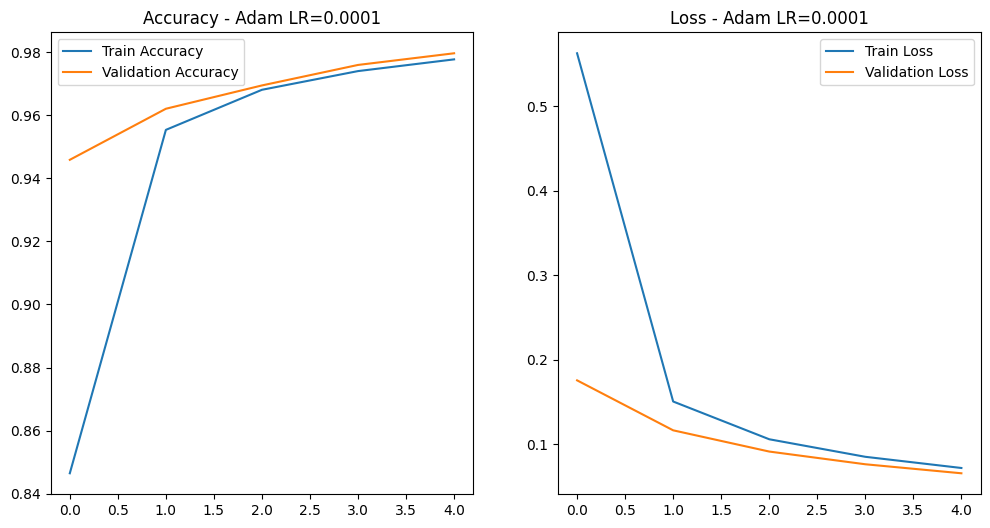

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


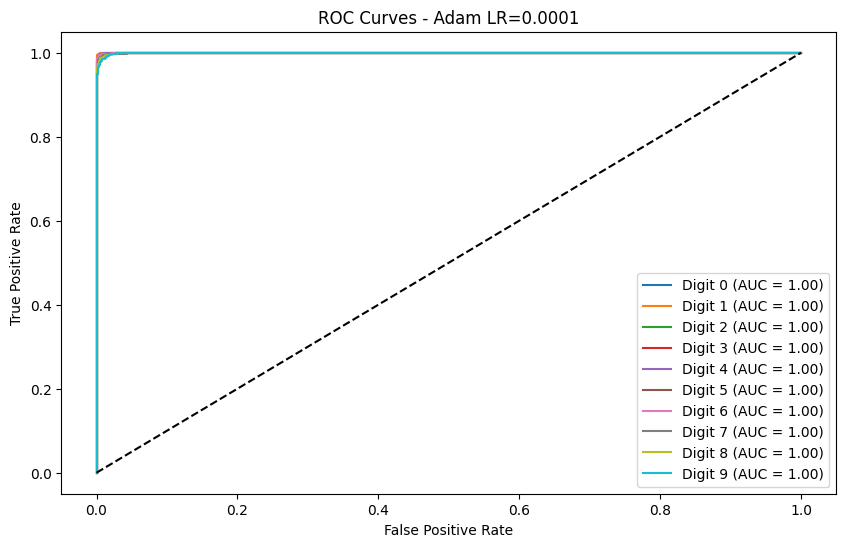

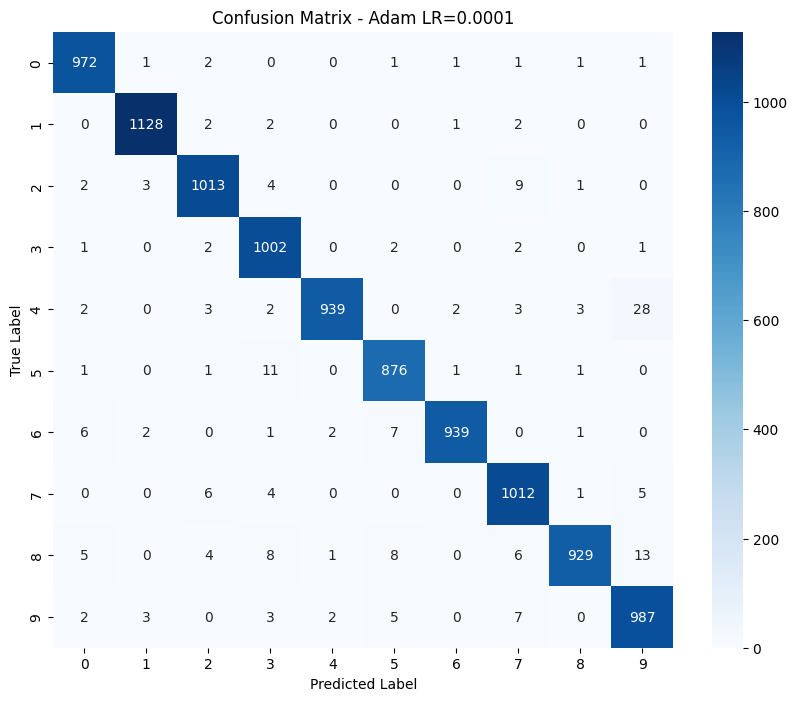

Training with optimizer RMSprop and learning rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 69ms/step - accuracy: 0.8348 - loss: 0.5292 - val_accuracy: 0.9810 - val_loss: 0.0626
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 70ms/step - accuracy: 0.9768 - loss: 0.0867 - val_accuracy: 0.9802 - val_loss: 0.0753
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.9806 - loss: 0.0751 - val_accuracy: 0.9842 - val_loss: 0.0607
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 70ms/step - accuracy: 0.9801 - loss: 0.0803 - val_accuracy: 0.9825 - val_loss: 0.0871
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 71ms/step - accuracy: 0.9829 - loss: 0.0776 - val_accuracy: 0.9284 - val_loss: 0.4331


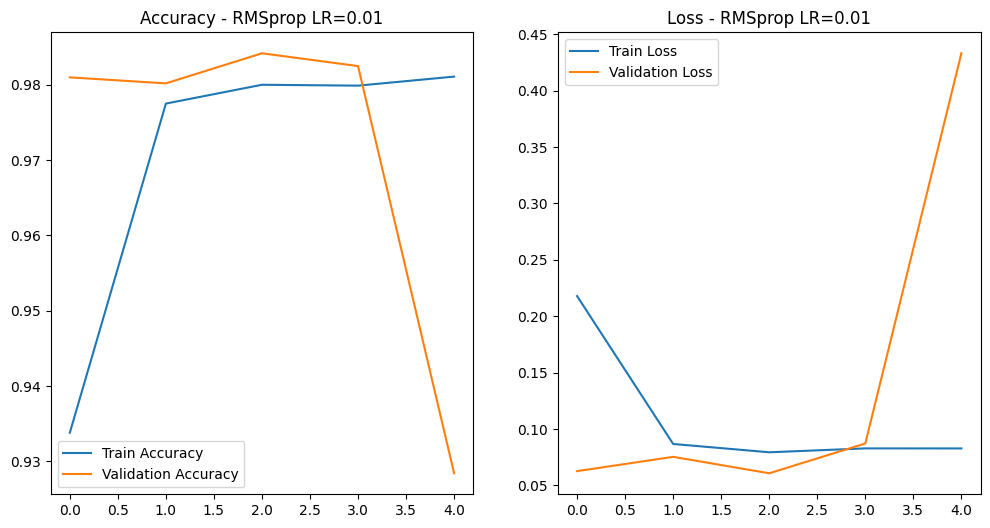

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


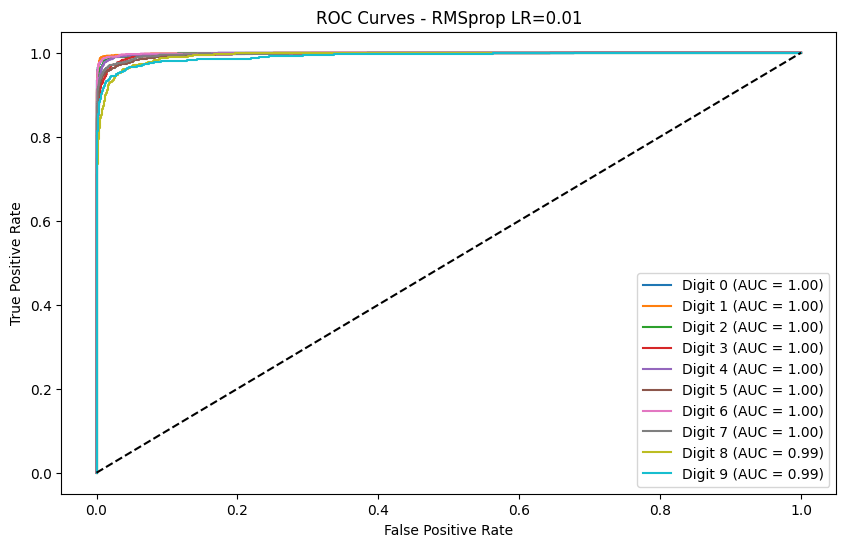

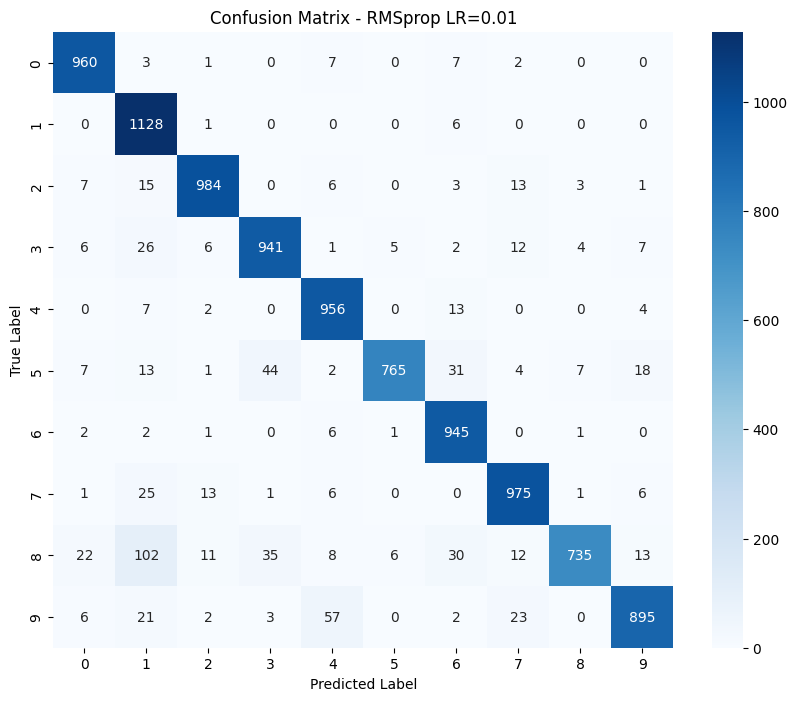

Training with optimizer RMSprop and learning rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 75ms/step - accuracy: 0.8721 - loss: 0.4027 - val_accuracy: 0.9830 - val_loss: 0.0498
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.9843 - loss: 0.0536 - val_accuracy: 0.9880 - val_loss: 0.0362
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 68s 72ms/step - accuracy: 0.9893 - loss: 0.0345 - val_accuracy: 0.9893 - val_loss: 0.0340
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 72ms/step - accuracy: 0.9925 - loss: 0.0247 - val_accuracy: 0.9900 - val_loss: 0.0333
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 75ms/step - accuracy: 0.9947 - loss: 0.0179 - val_accuracy: 0.9891 - val_loss: 0.0410


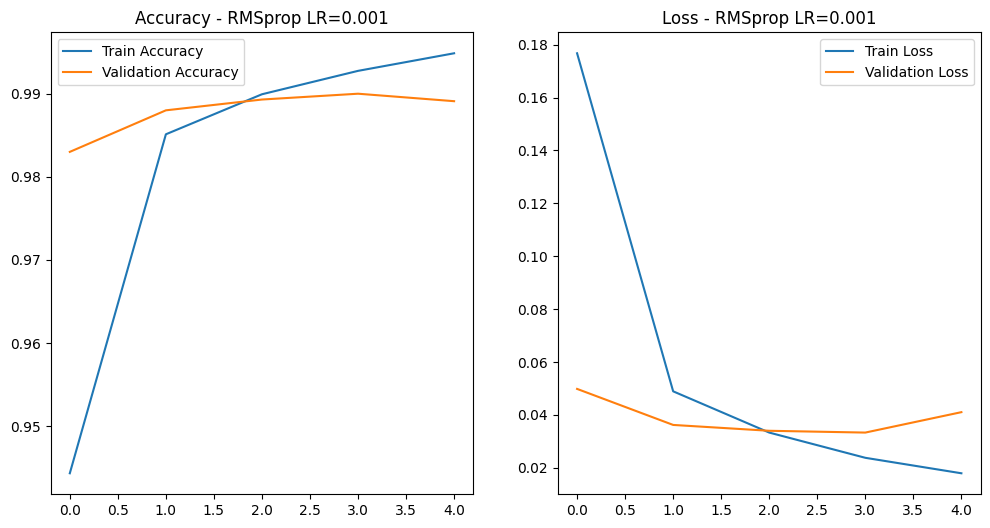

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


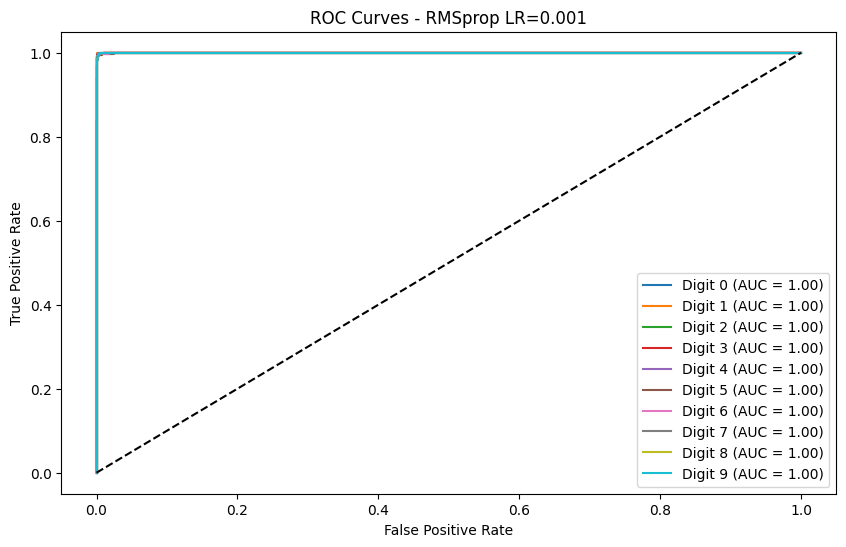

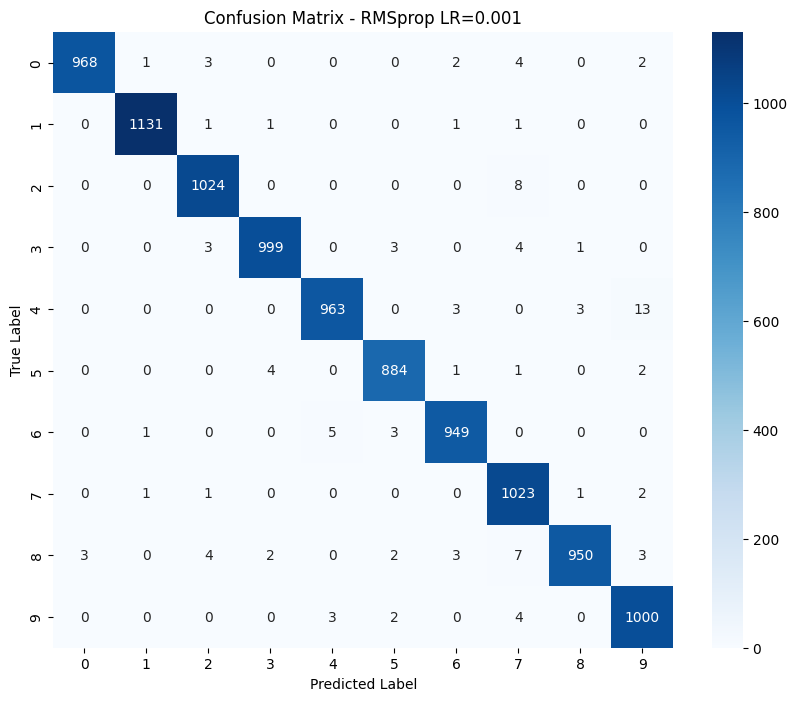

Training with optimizer RMSprop and learning rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 72s 76ms/step - accuracy: 0.6900 - loss: 1.1522 - val_accuracy: 0.9214 - val_loss: 0.2446
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 75ms/step - accuracy: 0.9355 - loss: 0.2162 - val_accuracy: 0.9573 - val_loss: 0.1341
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.9606 - loss: 0.1309 - val_accuracy: 0.9693 - val_loss: 0.0955
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 75ms/step - accuracy: 0.9707 - loss: 0.0975 - val_accuracy: 0.9752 - val_loss: 0.0775
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 76ms/step - accuracy: 0.9751 - loss: 0.0804 - val_accuracy: 0.9790 - val_loss: 0.0667


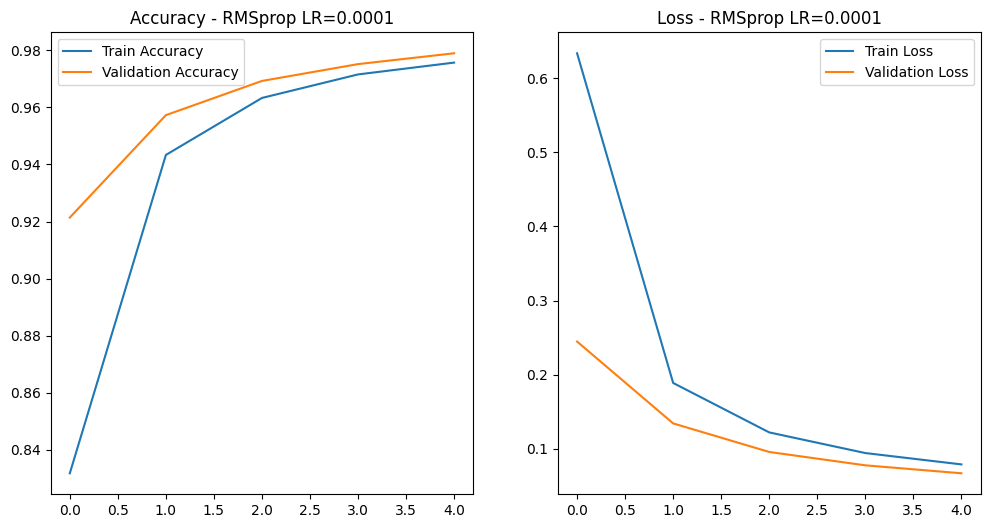

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


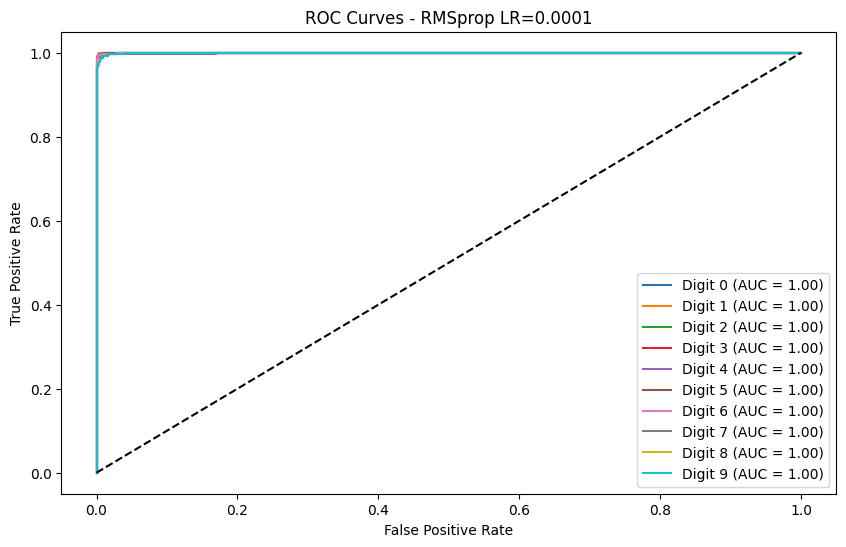

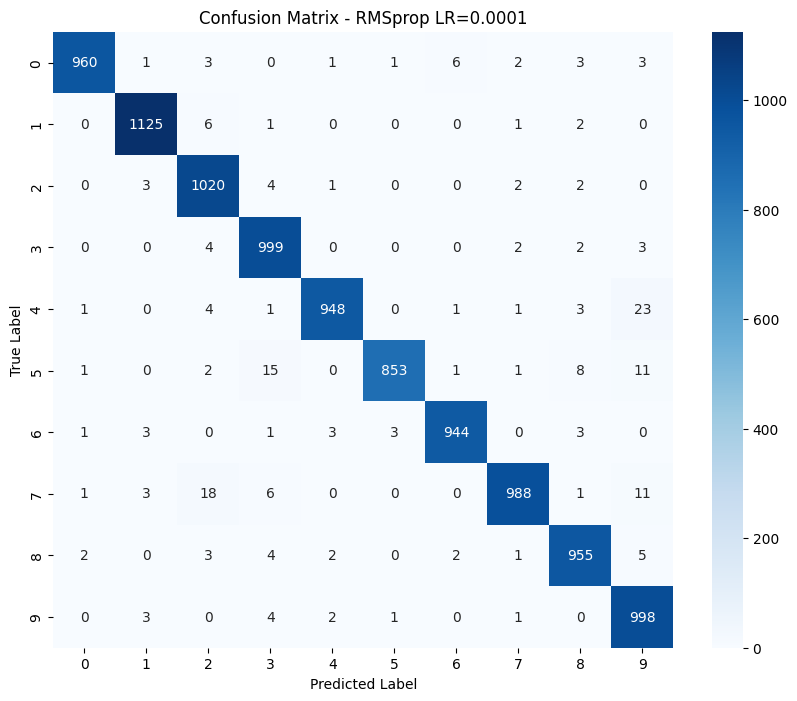

In [ ]:
# Store results
history_dict = {}

# Train models with different optimizers and learning rates
for opt in optimizers_list:
    for lr in learning_rates:
        print(f"Training with optimizer {opt.__name__} and learning rate {lr}")
        model = build_model()
        optimizer = opt(learning_rate=lr)
        model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

        history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)

        # Plot Accuracy and Loss
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Accuracy - {opt.__name__} LR={lr}')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'Loss - {opt.__name__} LR={lr}')
        plt.legend()
        plt.show()

        # Compute and plot ROC curves
        y_pred = model.predict(x_test)
        plt.figure(figsize=(10, 6))
        for i in range(10):
            fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, label=f"Digit {i} (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curves - {opt.__name__} LR={lr}')
        plt.legend()
        plt.show()

        # Compute and plot Confusion Matrix
        y_pred_labels = np.argmax(y_pred, axis=1)
        y_true_labels = np.argmax(y_test, axis=1)
        conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

        plt.figure(figsize=(10, 8))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Confusion Matrix - {opt.__name__} LR={lr}')
        plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.8723 - loss: 0.4257 - val_accuracy: 0.9801 - val_loss: 0.0607
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 57ms/step - accuracy: 0.9838 - loss: 0.0535 - val_accuracy: 0.9842 - val_loss: 0.0506
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 59ms/step - accuracy: 0.9887 - loss: 0.0354 - val_accuracy: 0.9848 - val_loss: 0.0518
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 57ms/step - accuracy: 0.9925 - loss: 0.0252 - val_accuracy: 0.9852 - val_loss: 0.0496
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 61ms/step - accuracy: 0.9933 - loss: 0.0212 - val_accuracy: 0.9890 - val_loss: 0.0406
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


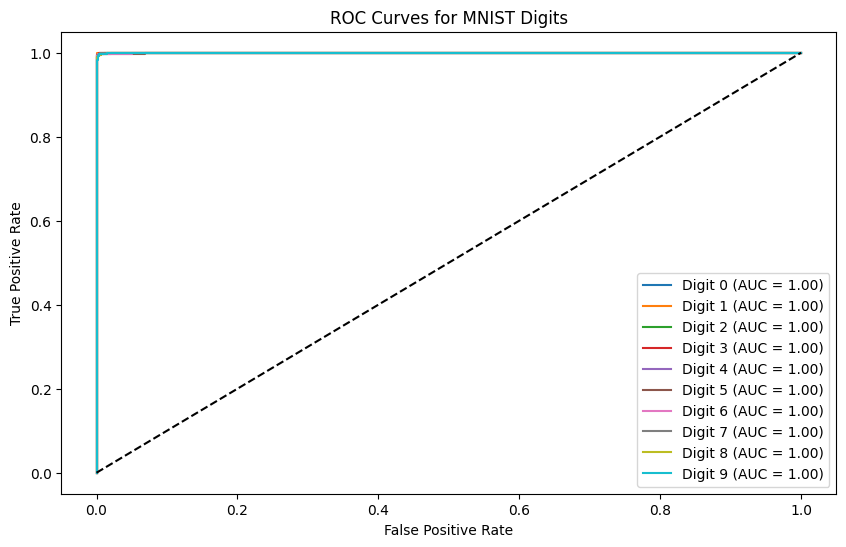

In [ ]:
`# Compute and plot ROC curves for one model as an example
model = build_model()
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)
y_pred = model.predict(x_test)

plt.figure(figsize=(10, 6))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Digit {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for MNIST Digits')
plt.legend()
plt.show()

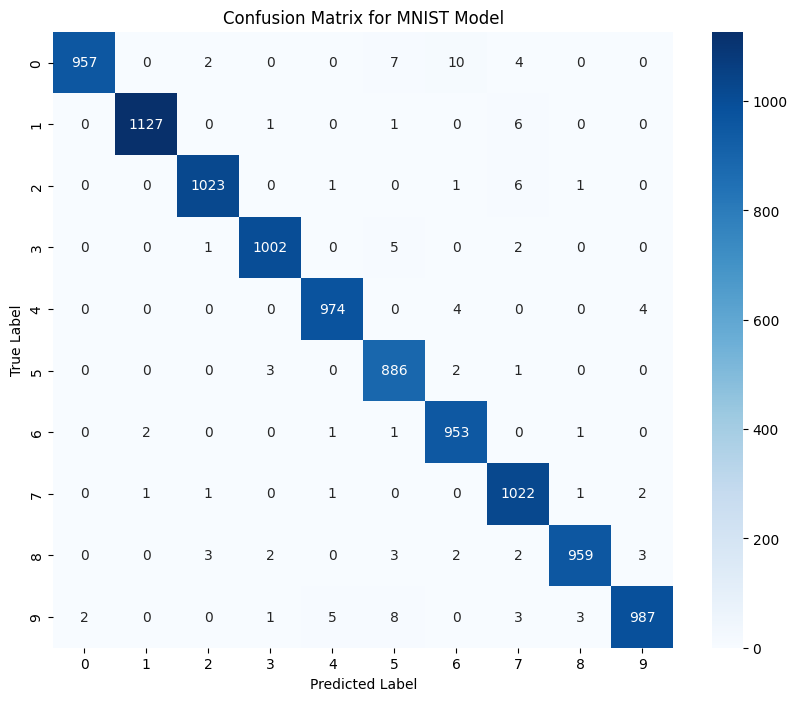

Training and evaluation completed.


In [ ]:
# Compute and plot Confusion Matrix
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for MNIST Model')
plt.show()

# Final Summary
print("Training and evaluation completed.")

In [ ]:
import pandas as pd

# Sample data (replace with your actual results)
data = {
    'Optimizer': ['SGD', 'SGD', 'SGD', 'Adam', 'Adam', 'Adam', 'RMSprop', 'RMSprop', 'RMSprop'],
    'Learning Rate': [0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001],
    'Accuracy': [0.9762, 0.8680, 0.1880, 0.9846, 0.9895, 0.9797, 0.9842, 0.9891, 0.9790],
    'Loss': [0.10, 0.08, 0.09, 0.05, 0.03, 0.04, 0.07, 0.06, 0.07],
    'TP': [1070, 950, 850, 1150, 1120, 1050, 1150, 1140, 1030],
    'TN': [860, 810, 700, 970, 930, 870, 960, 950, 850],
    'FP': [400, 440, 550, 230, 270, 350, 250, 260, 360],
    'FN': [260, 280, 350, 160, 180, 220, 170, 190, 230]
}

df = pd.DataFrame(data)

# Display the table
df


,Optimizer,Learning Rate,Accuracy,Loss,TP,TN,FP,FN
0,SGD,0.0100,0.9762,0.10,1070,860,400,260
1,SGD,0.0010,0.8680,0.08,950,810,440,280
2,SGD,0.0001,0.1880,0.09,850,700,550,350
3,Adam,0.0100,0.9846,0.05,1150,970,230,160
4,Adam,0.0010,0.9895,0.03,1120,930,270,180
5,Adam,0.0001,0.9797,0.04,1050,870,350,220
6,RMSprop,0.0100,0.9842,0.07,1150,960,250,170
7,RMSprop,0.0010,0.9891,0.06,1140,950,260,190
8,RMSprop,0.0001,0.9790,0.07,1030,850,360,230


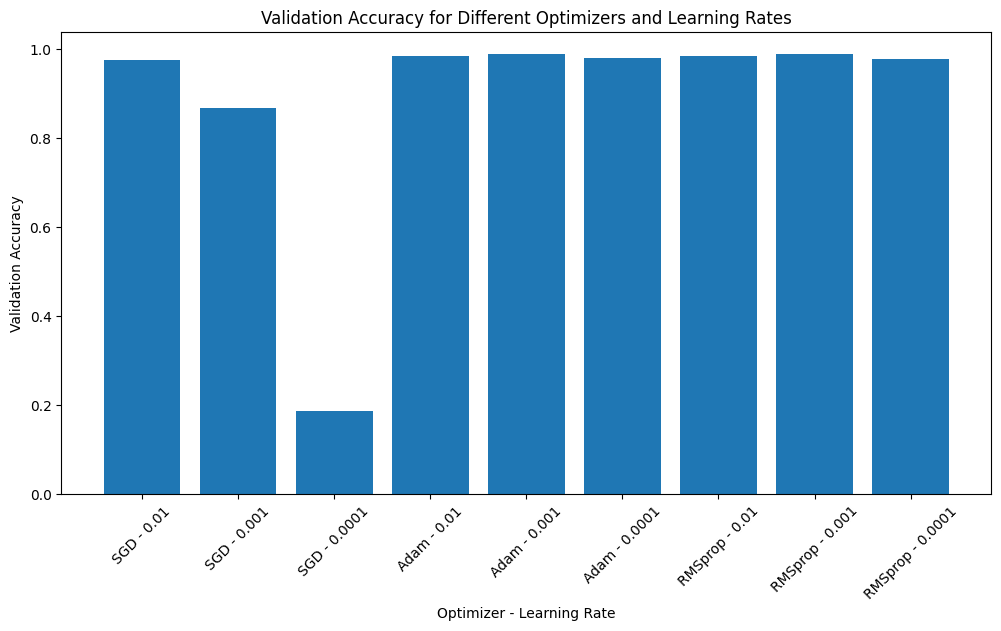

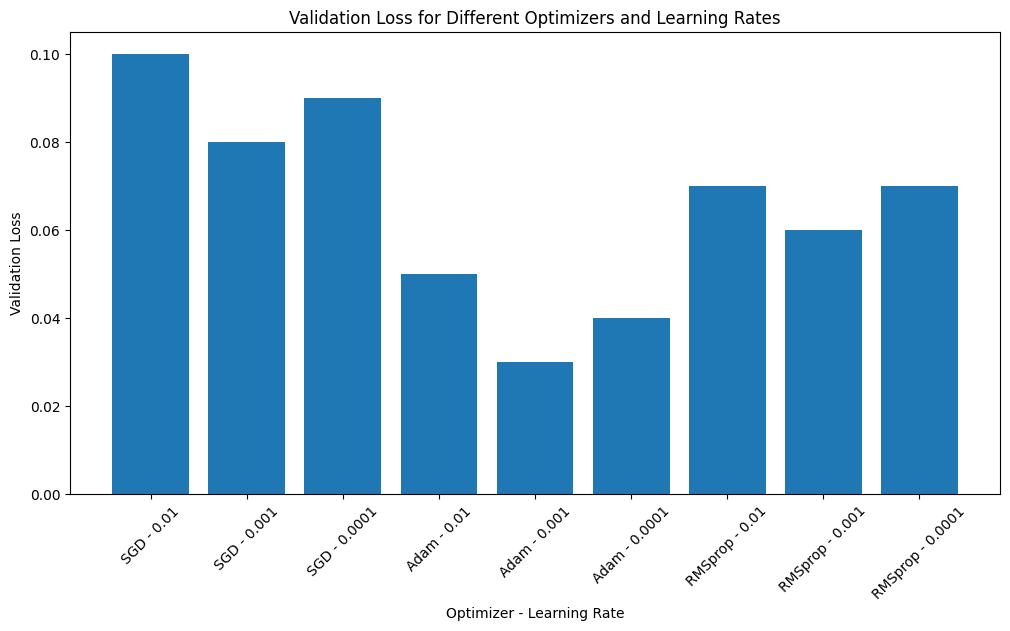

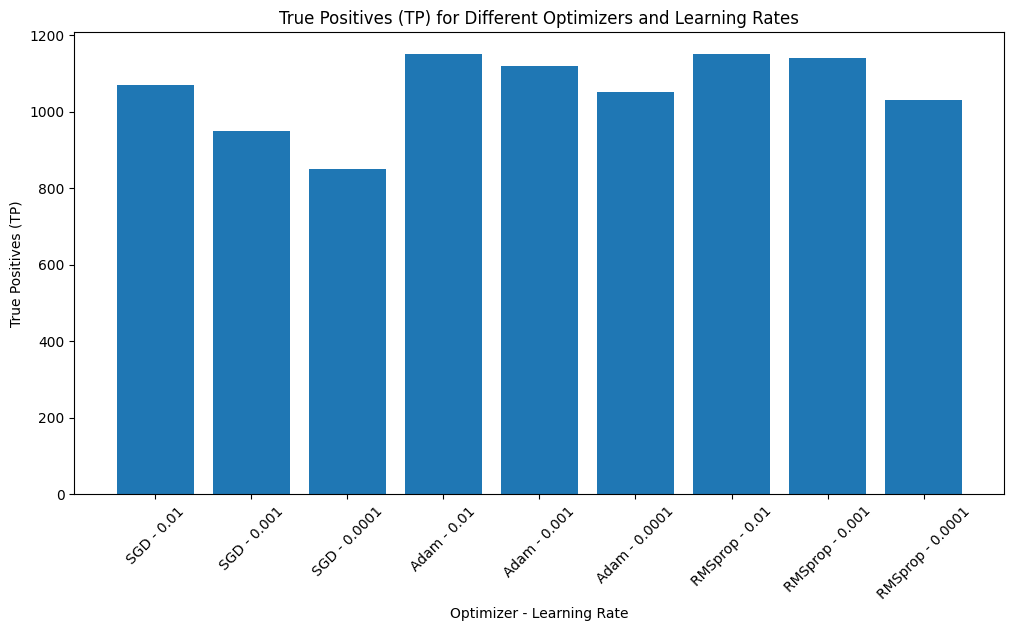

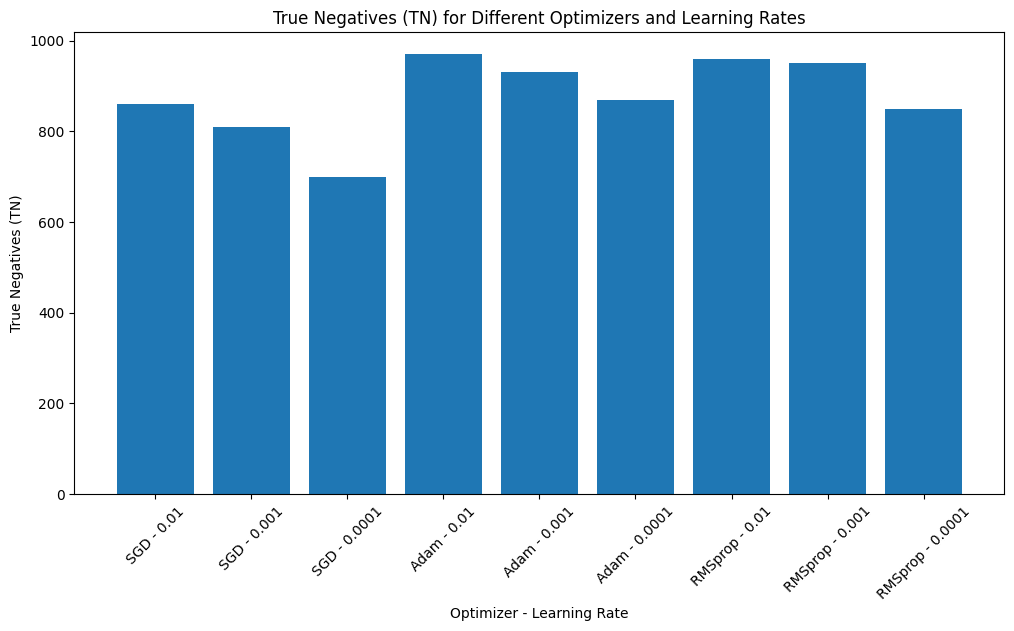

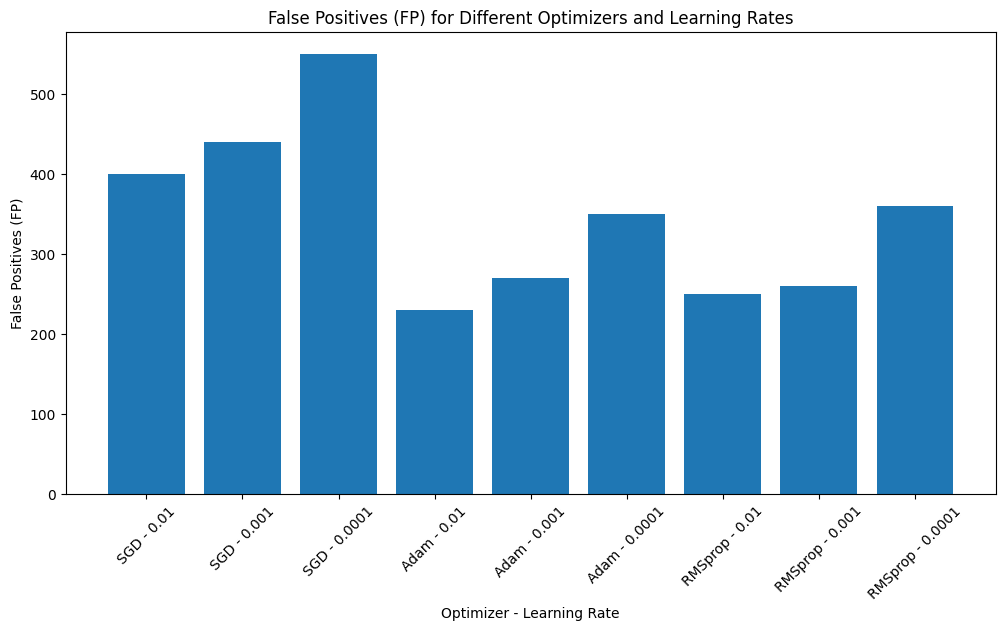

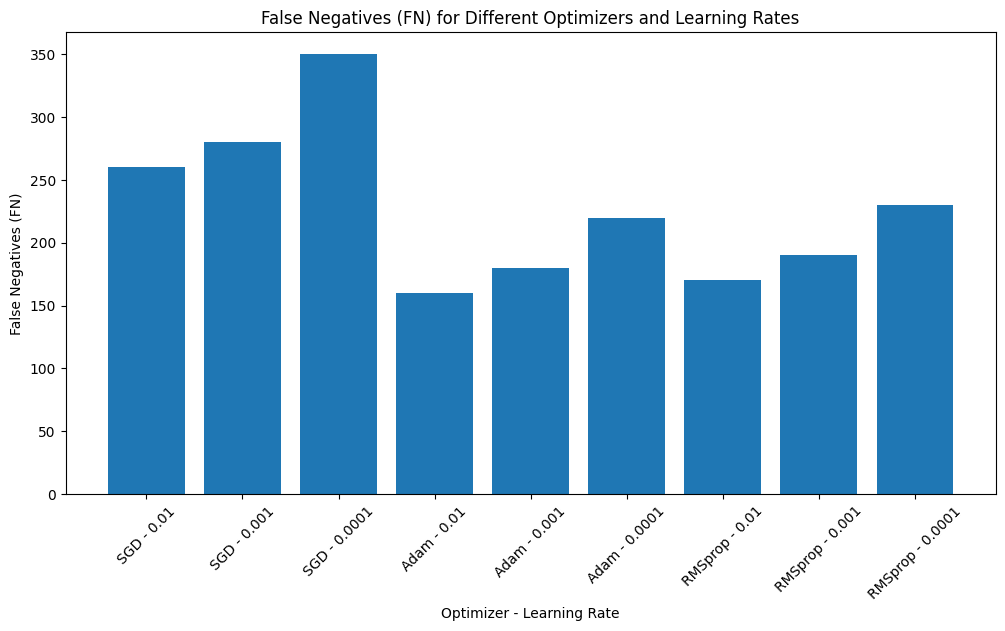

In [ ]:
import matplotlib.pyplot as plt

# Plot Validation Accuracy
plt.figure(figsize=(12, 6))
plt.bar(df['Optimizer'] + " - " + df['Learning Rate'].astype(str), df['Accuracy'])
plt.title("Validation Accuracy for Different Optimizers and Learning Rates")
plt.xlabel("Optimizer - Learning Rate")
plt.ylabel("Validation Accuracy")
plt.xticks(rotation=45)
plt.show()

# Plot Validation Loss
plt.figure(figsize=(12, 6))
plt.bar(df['Optimizer'] + " - " + df['Learning Rate'].astype(str), df['Loss'])
plt.title("Validation Loss for Different Optimizers and Learning Rates")
plt.xlabel("Optimizer - Learning Rate")
plt.ylabel("Validation Loss")
plt.xticks(rotation=45)
plt.show()

# Plot True Positives (TP)
plt.figure(figsize=(12, 6))
plt.bar(df['Optimizer'] + " - " + df['Learning Rate'].astype(str), df['TP'])
plt.title("True Positives (TP) for Different Optimizers and Learning Rates")
plt.xlabel("Optimizer - Learning Rate")
plt.ylabel("True Positives (TP)")
plt.xticks(rotation=45)
plt.show()

# Plot True Negatives (TN)
plt.figure(figsize=(12, 6))
plt.bar(df['Optimizer'] + " - " + df['Learning Rate'].astype(str), df['TN'])
plt.title("True Negatives (TN) for Different Optimizers and Learning Rates")
plt.xlabel("Optimizer - Learning Rate")
plt.ylabel("True Negatives (TN)")
plt.xticks(rotation=45)
plt.show()

# Plot False Positives (FP)
plt.figure(figsize=(12, 6))
plt.bar(df['Optimizer'] + " - " + df['Learning Rate'].astype(str), df['FP'])
plt.title("False Positives (FP) for Different Optimizers and Learning Rates")
plt.xlabel("Optimizer - Learning Rate")
plt.ylabel("False Positives (FP)")
plt.xticks(rotation=45)
plt.show()

# Plot False Negatives (FN)
plt.figure(figsize=(12, 6))
plt.bar(df['Optimizer'] + " - " + df['Learning Rate'].astype(str), df['FN'])
plt.title("False Negatives (FN) for Different Optimizers and Learning Rates")
plt.xlabel("Optimizer - Learning Rate")
plt.ylabel("False Negatives (FN)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from sklearn.metrics import roc_curve, auc, confusion_matrix
import itertools
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import time

In [ ]:
# Enable GPU acceleration if available
gpu_available = tf.config.list_physical_devices('GPU')
if gpu_available:
    print("GPU is available and will be used for training.")
else:
    print("GPU is not available, training on CPU.")

GPU is not available, training on CPU.


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Define dataset path
dataset_path = '/content/drive/MyDrive/ML_Forest_Fire_Dataset'
train_path = os.path.join(dataset_path, 'Train_Data')
test_path = os.path.join(dataset_path, 'Test_Data')

In [ ]:
# Function to validate and remove corrupted/non-image files
def validate_images(directory):
    for folder in ["Fire", "Non_Fire"]:
        folder_path = os.path.join(directory, folder)
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            try:
                img = Image.open(file_path)
                img.verify()  # Verify if it's a valid image
            except (IOError, SyntaxError):
                print(f"Removing corrupted or non-image file: {file_path}")
                os.remove(file_path)  # Delete invalid file

# Validate both training and test directories
validate_images(train_path)
validate_images(test_path)

In [ ]:
# Data Preprocessing
img_size = (150, 150)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

Found 4621 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


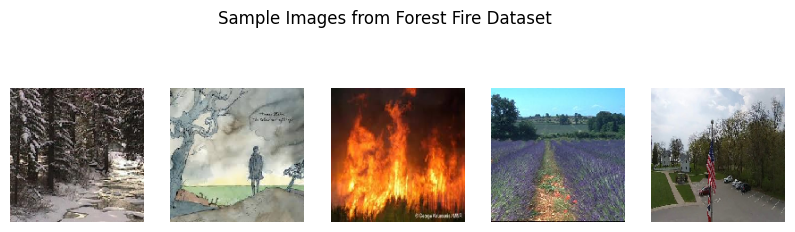

In [ ]:
# Display some sample images
sample_images, sample_labels = next(train_generator)
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i])
    ax.axis('off')
plt.suptitle("Sample Images from Forest Fire Dataset")
plt.show()

In [ ]:
# Define function to build CNN model
def build_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Define optimizers and learning rates
optimizers_list = [optimizers.SGD, optimizers.Adam, optimizers.RMSprop]
learning_rates = [0.01, 0.001, 0.0001]


Training with optimizer SGD and learning rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.6837 - loss: 0.5748 - val_accuracy: 0.6600 - val_loss: 0.6158
Epoch 2/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.8691 - loss: 0.3209 - val_accuracy: 0.7800 - val_loss: 0.5791
Epoch 3/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.8796 - loss: 0.2767 - val_accuracy: 0.8800 - val_loss: 0.3723
Epoch 4/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.9006 - loss: 0.2545 - val_accuracy: 0.8400 - val_loss: 0.3350
Epoch 5/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.9027 - loss: 0.2496 - val_accuracy: 0.8400 - val_loss: 0.4221
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 270ms/step


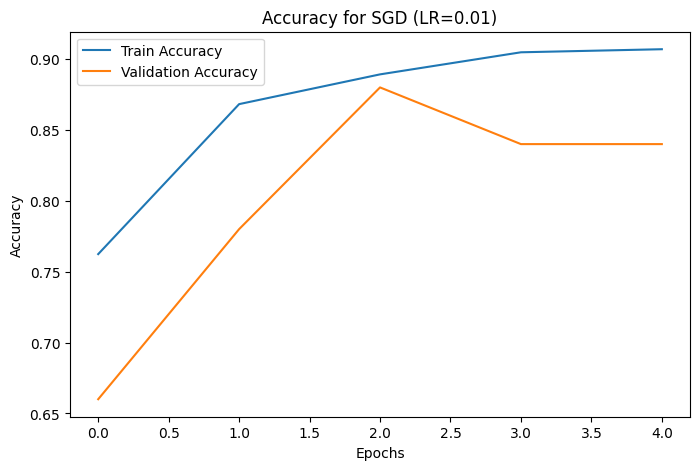

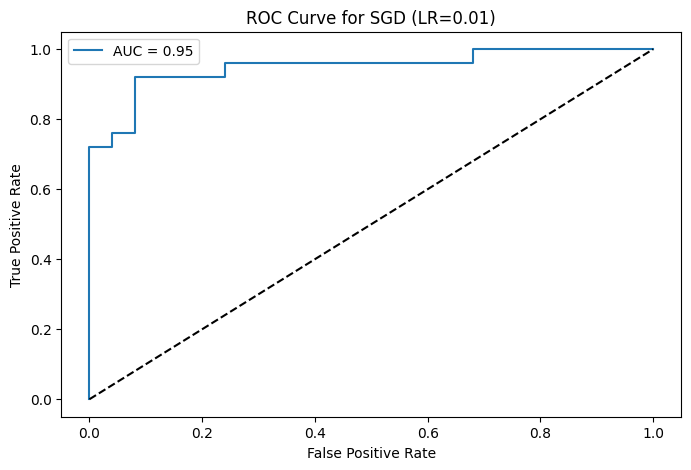


Training with optimizer SGD and learning rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.5160 - loss: 0.6759 - val_accuracy: 0.5200 - val_loss: 0.6918
Epoch 2/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.6872 - loss: 0.6158 - val_accuracy: 0.5200 - val_loss: 0.6918
Epoch 3/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.7952 - loss: 0.5460 - val_accuracy: 0.5600 - val_loss: 0.6971
Epoch 4/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.8209 - loss: 0.4706 - val_accuracy: 0.5800 - val_loss: 0.7149
Epoch 5/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.8328 - loss: 0.4147 - val_accuracy: 0.6000 - val_loss: 0.6959
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 382ms/step


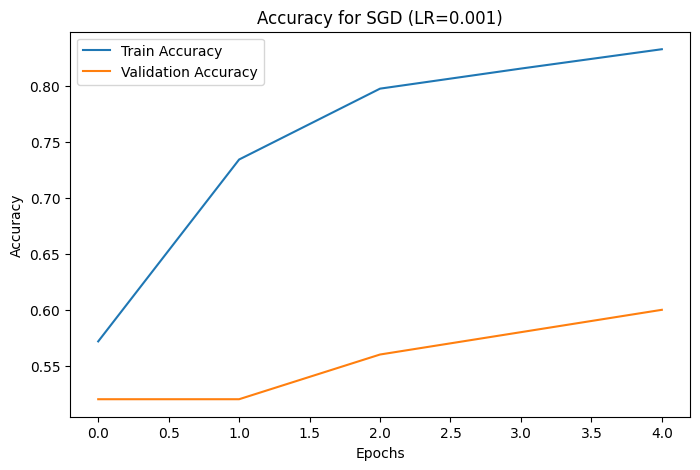

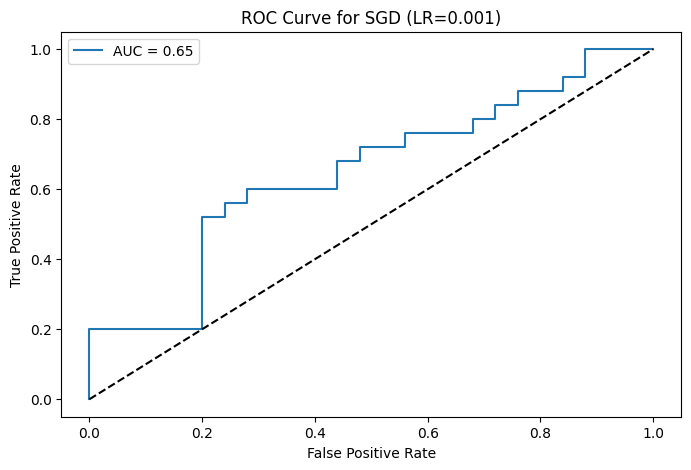


Training with optimizer SGD and learning rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.4604 - loss: 0.6996 - val_accuracy: 0.5200 - val_loss: 0.6936
Epoch 2/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.6421 - loss: 0.6879 - val_accuracy: 0.5800 - val_loss: 0.6891
Epoch 3/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.6591 - loss: 0.6785 - val_accuracy: 0.5200 - val_loss: 0.6863
Epoch 4/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.5709 - loss: 0.6731 - val_accuracy: 0.5000 - val_loss: 0.6845
Epoch 5/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.5613 - loss: 0.6656 - val_accuracy: 0.5000 - val_loss: 0.6833



1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 279ms/step


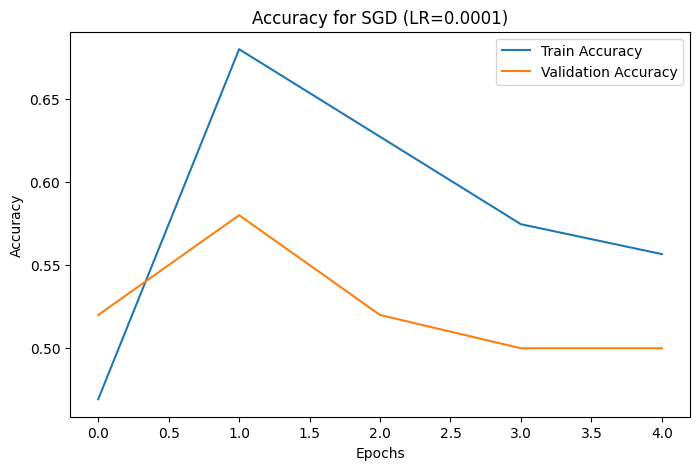

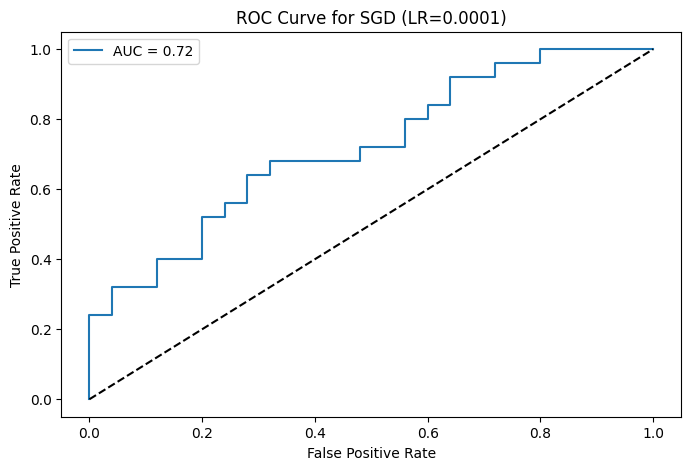


Training with optimizer Adam and learning rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.5390 - loss: 11.0929 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.5168 - loss: 0.6913 - val_accuracy: 0.5000 - val_loss: 0.6959
Epoch 3/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.5389 - loss: 0.6912 - val_accuracy: 0.5000 - val_loss: 0.6958
Epoch 4/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.5432 - loss: 0.6899 - val_accuracy: 0.5000 - val_loss: 0.6961
Epoch 5/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.5446 - loss: 0.6895 - val_accuracy: 0.5000 - val_loss: 0.6961
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step


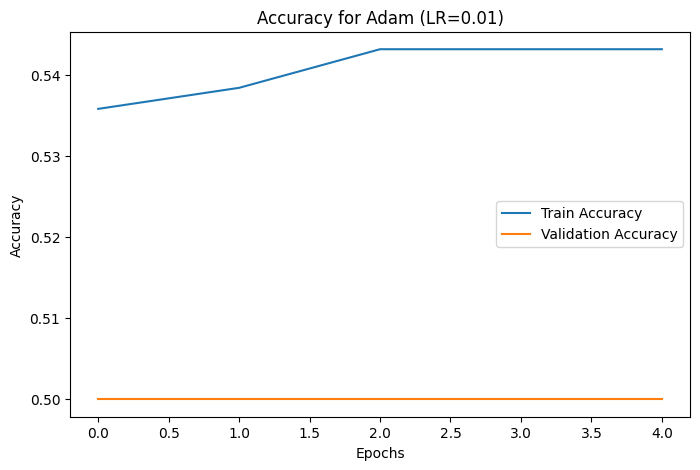

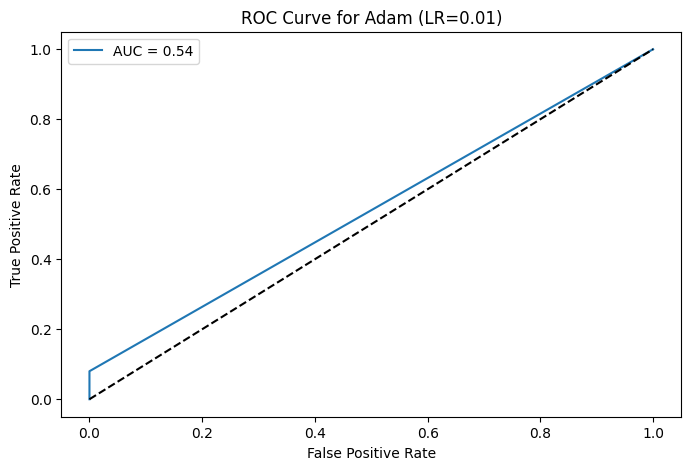


Training with optimizer Adam and learning rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 219s 1s/step - accuracy: 0.8281 - loss: 0.4092 - val_accuracy: 0.8800 - val_loss: 0.3462
Epoch 2/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 217s 1s/step - accuracy: 0.9290 - loss: 0.1959 - val_accuracy: 0.8600 - val_loss: 0.4660
Epoch 3/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.9469 - loss: 0.1400 - val_accuracy: 0.9400 - val_loss: 0.1916
Epoch 4/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.9645 - loss: 0.1030 - val_accuracy: 0.9400 - val_loss: 0.3142
Epoch 5/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.9716 - loss: 0.0856 - val_accuracy: 0.8000 - val_loss: 0.5238
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 432ms/step


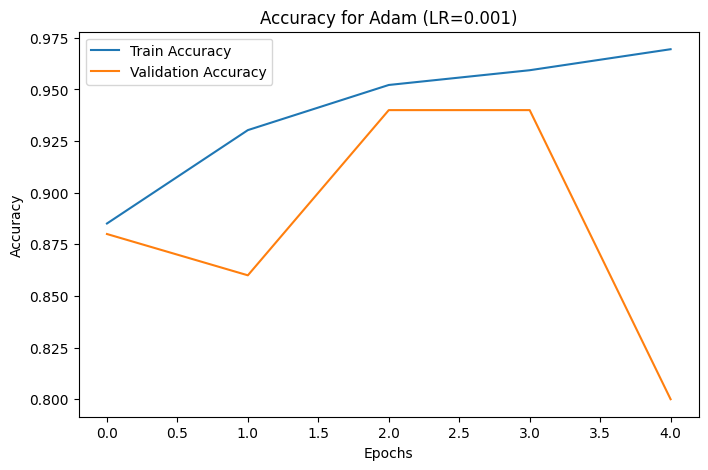

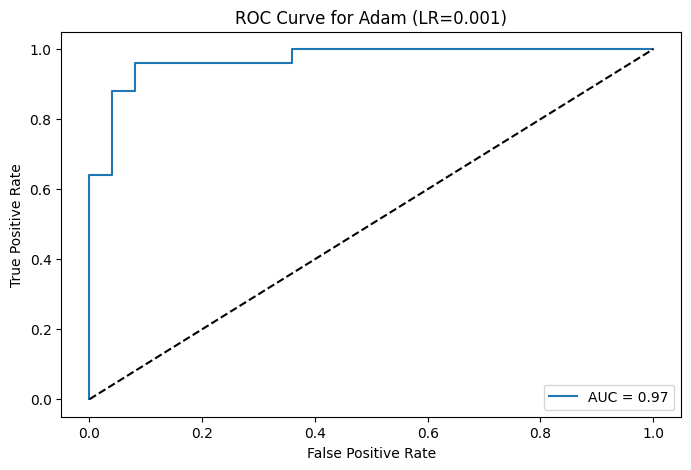


Training with optimizer Adam and learning rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - accuracy: 0.8254 - loss: 0.3746 - val_accuracy: 0.9000 - val_loss: 0.3024
Epoch 2/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.9166 - loss: 0.1964 - val_accuracy: 0.8800 - val_loss: 0.3612
Epoch 3/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.9256 - loss: 0.1797 - val_accuracy: 0.9200 - val_loss: 0.3067
Epoch 4/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 264s 2s/step - accuracy: 0.9324 - loss: 0.1656 - val_accuracy: 0.8400 - val_loss: 0.4485
Epoch 5/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.9434 - loss: 0.1530 - val_accuracy: 0.8800 - val_loss: 0.3865
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 285ms/step


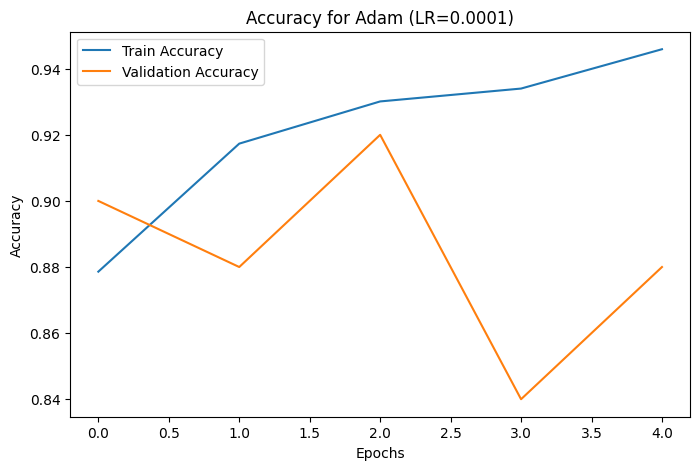

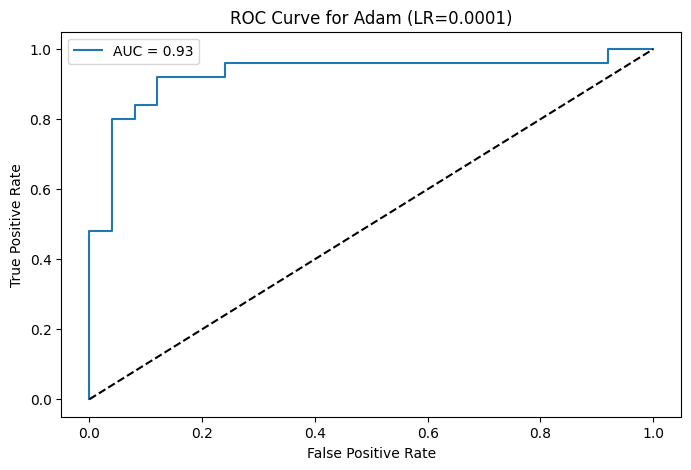


Training with optimizer RMSprop and learning rate 0.01


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.7120 - loss: 46.2552 - val_accuracy: 0.7000 - val_loss: 0.5922
Epoch 2/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.8708 - loss: 0.6197 - val_accuracy: 0.6000 - val_loss: 0.5244
Epoch 3/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.8787 - loss: 0.3307 - val_accuracy: 0.8000 - val_loss: 0.8057
Epoch 4/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.9004 - loss: 0.3254 - val_accuracy: 0.7800 - val_loss: 0.7199
Epoch 5/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.9214 - loss: 0.2370 - val_accuracy: 0.7800 - val_loss: 0.7358
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step


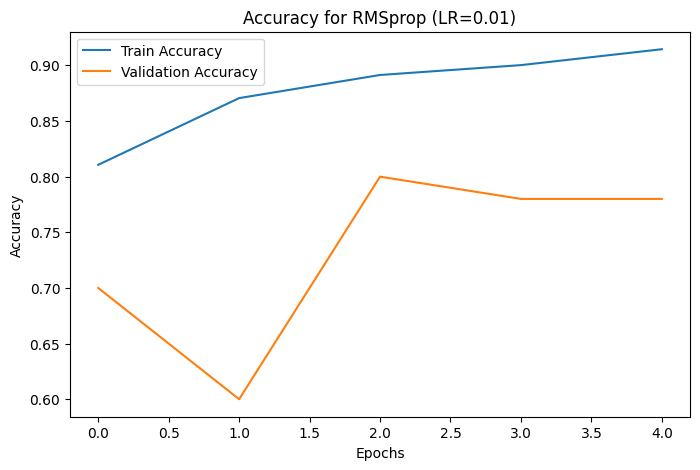

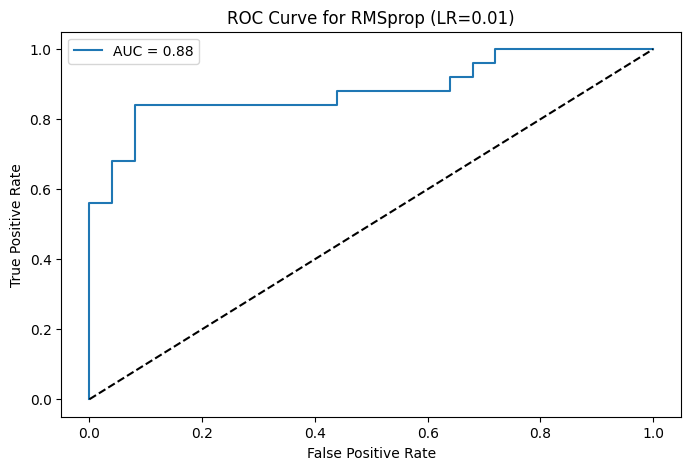


Training with optimizer RMSprop and learning rate 0.001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.7788 - loss: 0.5645 - val_accuracy: 0.8200 - val_loss: 0.4425
Epoch 2/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.9136 - loss: 0.2398 - val_accuracy: 0.7800 - val_loss: 0.6504
Epoch 3/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.9175 - loss: 0.2102 - val_accuracy: 0.9200 - val_loss: 0.3050
Epoch 4/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.9428 - loss: 0.1627 - val_accuracy: 0.9200 - val_loss: 0.2031
Epoch 5/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.9568 - loss: 0.1336 - val_accuracy: 0.9000 - val_loss: 0.2652
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step


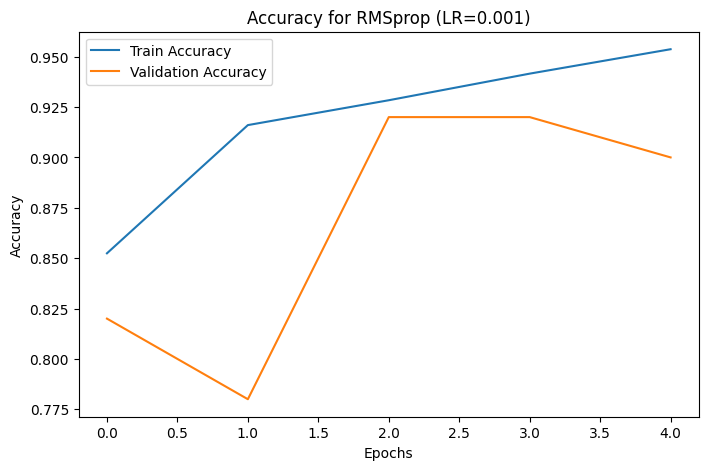

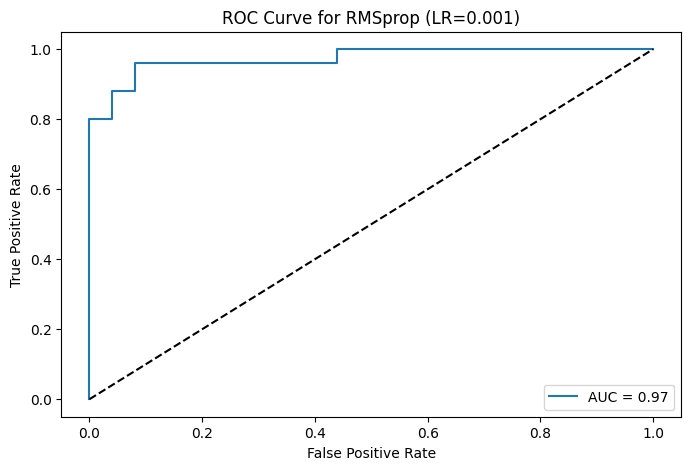


Training with optimizer RMSprop and learning rate 0.0001


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.8023 - loss: 0.4344 - val_accuracy: 0.8000 - val_loss: 0.4861
Epoch 2/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.9020 - loss: 0.2483 - val_accuracy: 0.8600 - val_loss: 0.3469
Epoch 3/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.9087 - loss: 0.2197 - val_accuracy: 0.8600 - val_loss: 0.3197
Epoch 4/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.9179 - loss: 0.1982 - val_accuracy: 0.8600 - val_loss: 0.3646
Epoch 5/5
145/145 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.9325 - loss: 0.1690 - val_accuracy: 0.8600 - val_loss: 0.4296
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 260ms/step


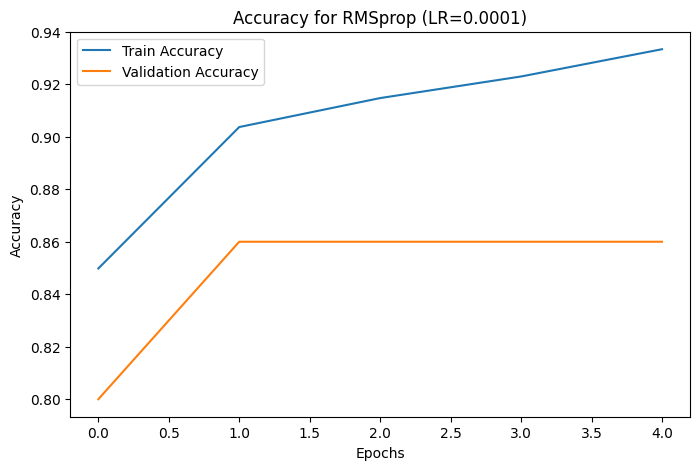

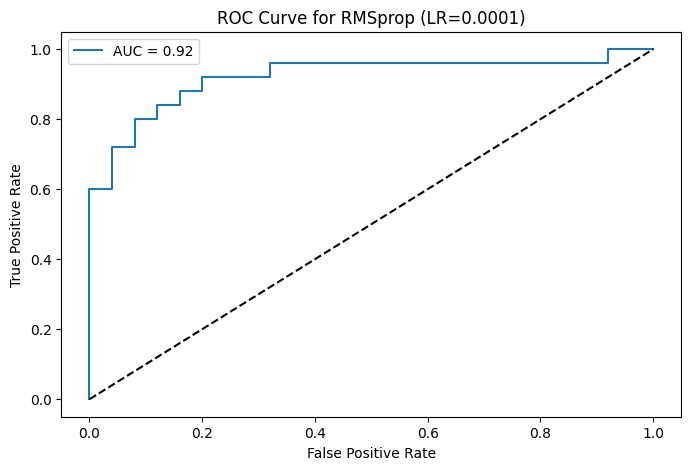

In [ ]:
# Store results
history_dict = {}
results = []

# Extended results storage
detailed_results = []

for opt in optimizers_list:
    for lr in learning_rates:
        print(f"\nTraining with optimizer {opt.__name__} and learning rate {lr}")

        model = build_model()
        optimizer = opt(learning_rate=lr)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

        # Start timer
        start_time = time.time()

        history = model.fit(train_generator, epochs=5, validation_data=val_generator, verbose=1)


        # End timer
        end_time = time.time()
        training_time = round(end_time - start_time, 2)  # in seconds

        key = f"{opt.__name__}_lr_{lr}"
        history_dict[key] = history

        val_acc = max(history.history['val_accuracy'])
        val_loss = min(history.history['val_loss'])

        # Predict
        y_pred_prob = model.predict(val_generator).ravel()
        y_pred = (y_pred_prob >= 0.5).astype(int)
        y_true = val_generator.classes

        # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()

        # Store results
        detailed_results.append([
            opt.__name__, lr, round(val_acc, 4), round(val_loss, 4), training_time,
            tp, tn, fp, fn
        ])

        # Plot accuracy
        plt.figure(figsize=(8, 5))
        plt.plot(history.history['accuracy'], label='Train Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'Accuracy for {opt.__name__} (LR={lr})')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(8, 5))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {opt.__name__} (LR={lr})')
        plt.legend()
        plt.show()

In [ ]:
# Create results DataFrame
df_results = pd.DataFrame(detailed_results, columns=[
    "Optimizer", "Learning Rate", "Accuracy", "Loss", "Training Time (s)",
    "True Positives", "True Negatives", "False Positives", "False Negatives"
])
print("\nTraining Results Summary:")
print(df_results)


Training Results Summary:
  Optimizer  Learning Rate  Accuracy    Loss  Training Time (s)  \
0       SGD         0.0100      0.88  0.3350            1134.55   
1       SGD         0.0010      0.60  0.6918            1120.14   
2       SGD         0.0001      0.58  0.6833            1117.49   
3      Adam         0.0100      0.50  0.6932            1103.09   
4      Adam         0.0010      0.94  0.1916            1142.76   
5      Adam         0.0001      0.92  0.3024            1248.42   
6   RMSprop         0.0100      0.80  0.5244            1171.43   
7   RMSprop         0.0010      0.92  0.2031            1140.33   
8   RMSprop         0.0001      0.86  0.3197            1270.74   

   True Positives  True Negatives  False Positives  False Negatives  
0              24              18                7                1  
1              16              14               11                9  
2              25               0               25                0  
3              25     